# Predictive Analytics: Regression (House Price)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats

In [2]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Identifying the shape of the data frame
print(f'The test DataFrame has a total of: \n {df_train.shape[0]} rows\n {df_train.shape[1]} columns')

The test DataFrame has a total of: 
 1460 rows
 81 columns


## Data Cleaning

In [4]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Missing Data

The grpah provide a quick visual for easy intepretation of missing data with a line graph.

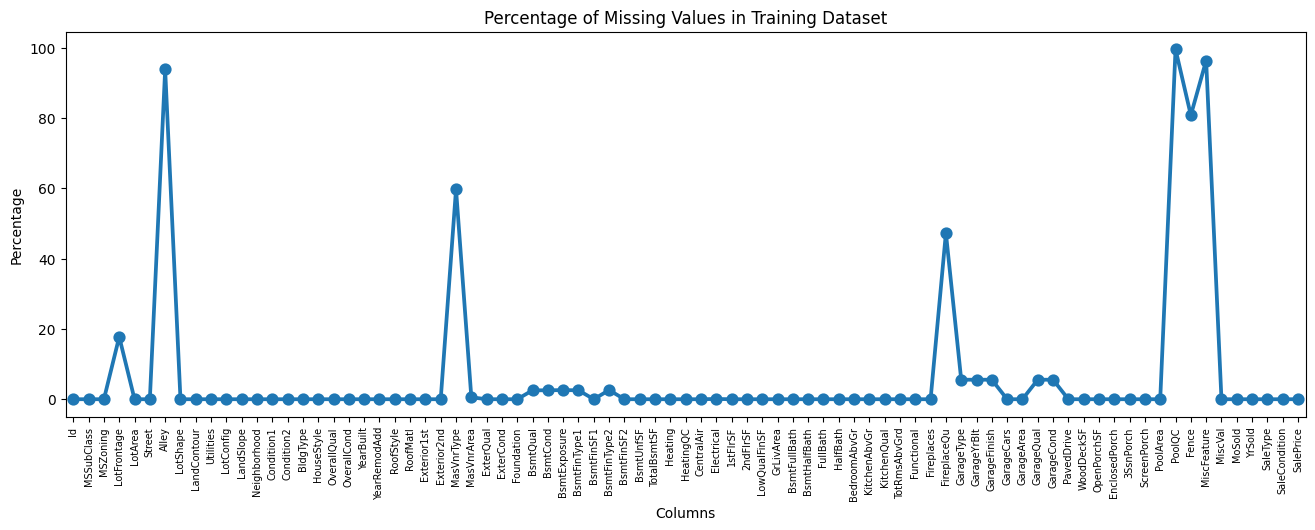

In [5]:
# Creation of new df to calculate percentage of missing data
missing = pd.DataFrame((df_train.isnull().sum()) * 100 / df_train.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Training Dataset")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

The table below provide a confirmation with no missing data in the dataset as all variable have 0% of missing value.

In [6]:
# Calculate Nan percent in each column
nan_percent_pa = (df_train.isna().sum() / len(df_train)) * 100


# Create a DataFrame from the series
nan_percent_pa_df = nan_percent_pa.reset_index()
nan_percent_pa_df.columns = ['Column', 'NaN_Percent']


# Sort the DataFrame by the percentage of NaNs in ascending order
nan_percent_df = nan_percent_pa_df.sort_values(by='NaN_Percent', ascending=False)


# Print the top variable with missing data in the variable. Because there is 14 variable with missing data therefore only the top 14 is display.
nan_percent_df.head(10)

,Column,NaN_Percent
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
25,MasVnrType,59.726027
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
59,GarageYrBlt,5.547945
64,GarageCond,5.547945
58,GarageType,5.547945


### Remove Variable

The code below show the removal os several variable due to high amount of missing observation within the dataset.

In [7]:
# Creating a list of column to be drop
column_to_drop = ['PoolQC',
                  'MiscFeature',
                  'Alley',
                  'Fence',
                  'MasVnrType',
                  'FireplaceQu',
                  'LotFrontage']


# Drop the column on both dataset (Train and test set) 
df_train.drop(columns=column_to_drop, inplace =True)
df_test.drop(columns=column_to_drop, inplace = True)

### Handle Missing Value

Based on the line chart below, it show the remaining missing data within the variable. There is currently 11 column with missing data less than 5%.

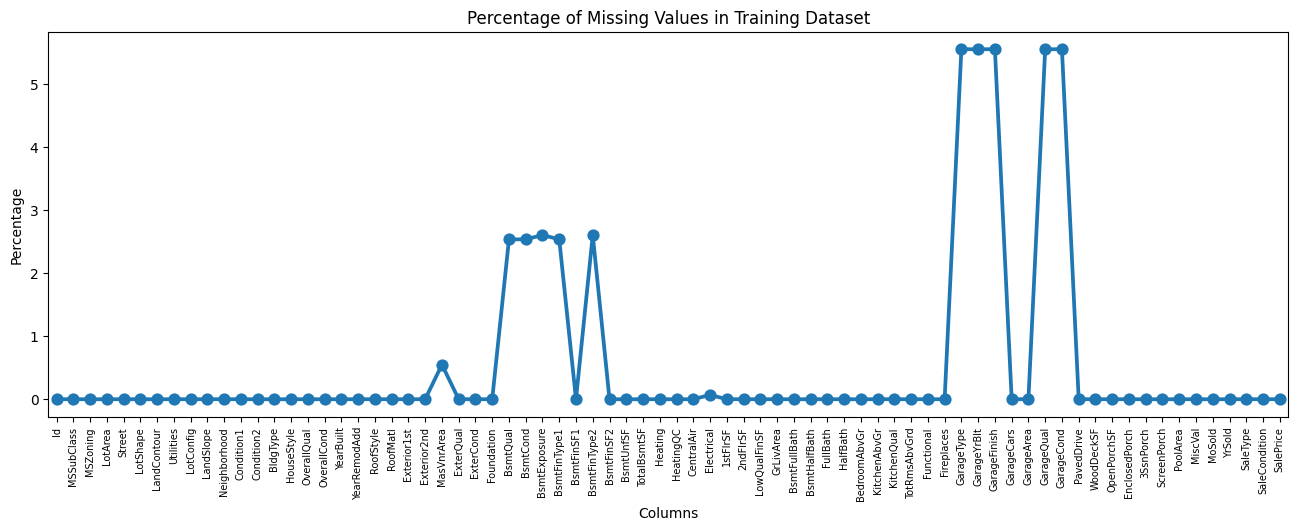

In [8]:
# Creation of new df to calculate percentage of missing data
missing = pd.DataFrame((df_train.isnull().sum()) * 100 / df_train.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Training Dataset")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

The code below segregate the variable into the respective data types.

In [13]:
# Empty list for storing variable with missing data
variables = []


# Create a for loop identifying variable with missing data
for col in df_train.columns:
    if df_train[col].isnull().any():
        variables.append(col)


# Empty list for storing categorical data
numeric = []
object = []


# For loop to identify the data types and appending it
for variable in variables:
    if df_train[variable].dtypes == 'float64' or df_train[variable].dtypes == 'int':
        numeric.append(variable)
    else:
        object.append(variable)


# Print out the variable based on category
print('Numeric Data Structure')
for i,item in enumerate(numeric):
    print(i,item)
print('\n')

print('Object Data Structure')
for i,item in enumerate(object):
    print(i,item)

Numeric Data Structure
0 MasVnrArea
1 GarageYrBlt


Object Data Structure
0 BsmtQual
1 BsmtCond
2 BsmtExposure
3 BsmtFinType1
4 BsmtFinType2
5 Electrical
6 GarageType
7 GarageFinish
8 GarageQual
9 GarageCond


Calculating the mean for the variable with missing data to replace the missing values.

In [21]:
mean = []

for j in numeric:
    m = df_train[j].mean().round(2)
    mean.append(m)
    print(j,m)

MasVnrArea 103.69
GarageYrBlt 1978.51


In [26]:
mode = []

for j in object:
   n = df_train[j].mode()[0]
   mode.append(n)
   print(j,n) 

BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


Replace the missing value

In [25]:
numeric_tuple = zip(numeric,mean)
print(tuple(numeric_tuple))

for i,j in numeric_tuple:
    df_train[i].fillna(j, inplace = True)

(('MasVnrArea', 103.69), ('GarageYrBlt', 1978.51))
